<a href="https://colab.research.google.com/github/edelangelmz/Inteligencia-Artificial/blob/main/Clasificaci%C3%B3n_con_SVM_y_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación con máquina de vectores de soporte y redes de neuronas**

## **Introducción**

Mediante esta actividad se pretende poner en práctica la creación de modelos basados en máquinas de soporte y redes de neuronas. El objetivo es comprender de forma práctica, con un problema determinado, las diferencias que existen a la hora de entrenar los diferentes modelos.

El conjunto de datos con el cual se trabajará se encuentra en el enlace siguiente:

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

## **Contexto del Dataset**

Bob ha comenzado su propia empresa de telefonía móvil. Quiere dar una pelea dura a las grandes empresas como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que fabrica su empresa. En este competitivo mercado de telefonía móvil no se puede simplemente asumir cosas. Para resolver este problema, recopila datos de ventas de teléfonos móviles de varias empresas.

Bob quiere averiguar alguna relación entre las funciones de un teléfono móvil (p. ej., RAM, memoria interna, etc.) y su precio de venta. Pero no es tan bueno en Machine Learning. Así que necesita ayuda para resolver este problema.

En este problema, no tiene que predecir el precio real, sino un rango de precios que indica qué tan alto es el precio.

## **Descripción del Dataset**

A continuación, se describen las columnas que conforman el dataset y se define si son consideradas variables categóricas o numéricas.

* **battery_power** Indica el total de energía que puede almacenar una batería en un tiempo determinado, medido en mAh. (numérica).
* **blue** Indica si el teléfono móvil cuenta o no con bluetooth (categórica).
* **clock_speed** Indica la velocidad a la que el microprocesador ejecuta las instrucciones (numérica).
* **dual_sim** Indica si el teléfono móvil soporta o no dual sim (categórica).
* **fc** Indica la cantidad de mega pixeles de la cámara frontal (numérica).
* **four_g** Indica si el teléfono móvil soporta o no 4G (categórica).
* **int_memory** Indica la cantidad de memoria interna en Gigabytes (numérica).
* **m_dep** Indica la profundidad del teléfono móvil en cm (numérica).
* **mobile_wt** Indica el peso del teléfono móvil (numérica).
* **n_cores** Indica el número de núcleos del procesador (numérica).
* **pc** Indica la cantidad de mega pixeles de la cámara primaria (numérica).
* **px_height** Indica la altura de la resolución en pixeles (numérica).
* **px_width** Indica el ancho de la resolución en pixeles (numérica).
* **ram** Indica la cantidad de RAM en Megabytes (numérica).
* **sc_h** Indica la altura de la pantalla del teléfono móvil en cm (numérica).
* **sc_w** Indica el ancho de la pantalla del teléfono móvil en cm (numérica).
* **talk_time** Indica el tiempo máximo que soporta la batería estando en llamada (numérica).
* **three_g** Indica si el teléfono móvil soporta o no 3G (categórica).
* **touch_screen** Indica si tiene o no pantalla tactil (categórica).
* **wifi** Indica si tiene o no wifi (categórica).
* **price_range** Indica el rango de precios definido para cada teléfono móvil (categórica).

Por lo que, organizándolas, quedarían:

**Variables numéricas:** 'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'

**Variables categóricas:** 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'

En el Dataset, la columna price_range es la considerada como variable objetivo y es importante notar que, a pesar de ser una variable categórica, cuenta con datos ordinales al existir un orden significativo.

## **Carga y análisis de los datos**

Primeramente, cargamos la totalidad de los datos del Dataset en un Dataframe y mostramos los primeros elementos para dar una idea del estilo de datos con el que se trabaja.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/edelangelmz/datasets/main/mobile_price_classification_train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Visualizamos en la ejecución anterior que contamos con 21 columnas y que no existe una columna de consecutivos para los registros o ID.

Mostramos la forma completa de la estructura de datos.

In [2]:
df.shape

(2000, 21)

La estructura cuenta con 2000 registros y 21 columnas.

Mostramos la información del Dataframe para identificar la existencia de valores nulos o faltantes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Visualizamos que todas las columnas cuentan con 2000 elementos y no existen datos nulos o faltantes.

Existen únicamente 2 columnas con valores flotantes, la que indica la velocidad de reloj y la que indica la profundidad del teléfono en cm; las 19 columnas restantes son de tipo entero y observamos que ya se encuentran codificadas las variables categóricas en números para su posterior procesamiento.

### **Datos estadísticos de las variables numéricas**

Una descripción del Dataframe nos permite observar datos estadísticos de cada una de las columnas. Para el caso de las columnas que pertenecen a las variables categóricas es irrelevante información como la media, desviación estándar, valores mínimos y máximos, etc., por lo que se separan aquellas variables numéricas de las categóricas o discretizadas para poder visualizar su información.

In [4]:
varNum = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
varCat = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [5]:
df[varNum].describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


Como dato interesante del análisis de la información podemos visualizar los **mínimos** en **px_height** (altura de la resolución en pixeles) y **sc_w** (ancho de la pantalla en cm). Dichos datos muestran un mínimo de 0, lo que supondría teléfonos con una altura de 0 pixeles de resolución y teléfonos de 0 cm de ancho de pantalla (o ausencia de esta), pero analizando el Dataset a detalle, dichos teléfonos muestran tener tanto anchura de resolución como altura en el tamaño de la pantalla sin dar indicios a la falta de esta, por lo que es posible creer que la información tuvo un preprocesamiento y al rellenar los datos faltantes estos fueron sustituidos por ceros.

In [6]:
print(df[df.sc_w == 0].head())

    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
12           1815     0          2.8         0   2       0          33    0.6   
24            503     0          1.2         1   5       1           8    0.4   
33           1310     1          2.2         1   0       1          51    0.6   
42           1253     1          0.5         1   5       1           5    0.2   
50           1547     1          3.0         1   2       1          14    0.7   

    mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
12        159        4  ...        607       748  1482    18     0          2   
24        111        3  ...        201      1245  2583    11     0         12   
33        100        4  ...        178      1919  3845     7     0         12   
42        152        2  ...        685       714  1878    15     0          4   
50        198        3  ...       1042      1832  2059     5     0         15   

    three_g  touch_screen 

### **Diferencias y frecuencia de las variables categóricas**

Para las variables categóricas, podemos enlistar las diferentes categorías y encontrar la frecuencia de cada una de ellas.

In [7]:
for cat in varCat:
  print(df[cat].value_counts(), "\n")

print(df['price_range'].value_counts())

0    1010
1     990
Name: blue, dtype: int64 

1    1019
0     981
Name: dual_sim, dtype: int64 

1    1043
0     957
Name: four_g, dtype: int64 

1    1523
0     477
Name: three_g, dtype: int64 

1    1006
0     994
Name: touch_screen, dtype: int64 

1    1014
0     986
Name: wifi, dtype: int64 

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


Con la información anterior observamos que las variables categóricas cuentan únicamente con 2 tipos y esto es entendible ya que solo buscan representar la presencia o ausencia de ciertas características en el dispositivo.

Para la variable objetivo observamos que cuenta con 4 categorías, que pueden ser consideradas como bajo, medio, alto y muy alto costo. Además, observamos que cuenta con la misma cantidad de elementos por categoría. Esto es un buen dato ya que el Dataset se encuentra balanceado y evitará que los modelos se carguen a una categoría en particular con mayor cantidad de ejemplos.

Graficamos mediante histogramas la variable objetivo con respecto a las variables categóricas para poder tener una mejor percepción de la información y el balanceo de las categorías.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

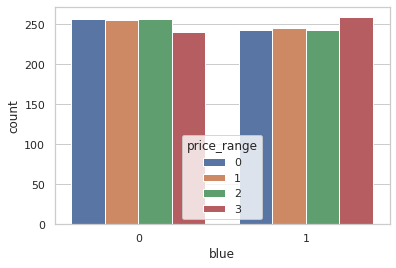

In [9]:
sns.countplot(data=df, x='blue', hue='price_range')
plt.show()

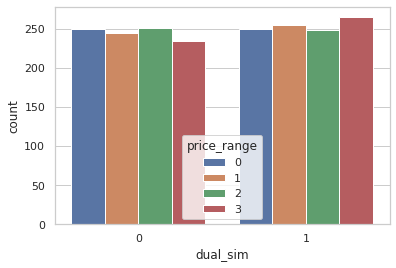

In [10]:
sns.countplot(data=df, x='dual_sim', hue='price_range')
plt.show()

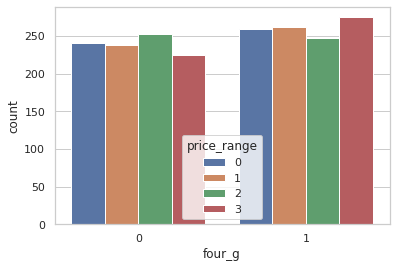

In [11]:
sns.countplot(data=df, x='four_g', hue='price_range')
plt.show()

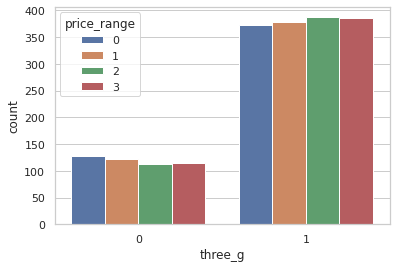

In [12]:
sns.countplot(data=df, x='three_g', hue='price_range')
plt.show()

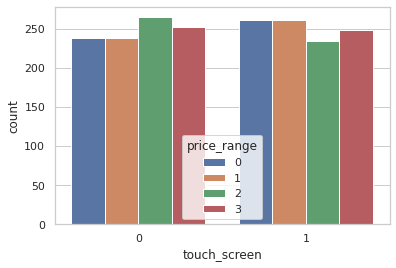

In [13]:
sns.countplot(data=df, x='touch_screen', hue='price_range')
plt.show()

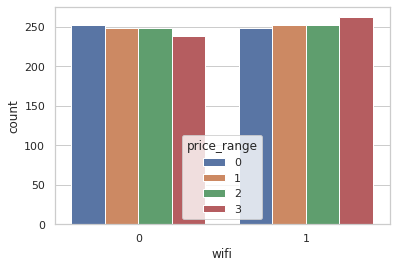

In [14]:
sns.countplot(data=df, x='wifi', hue='price_range')
plt.show()

### **Tabla de contingencia para variables categóricas**

Mediante las tablas cruzadas o también conocidas como tablas de contingencia es posible visualizar de una mejor manera el cómo se encuentran distribuidas las clases de cada variable categórica con respecto a las clases de la variable objetivo.

In [15]:
pd.crosstab(index=df['price_range'], columns=df['blue'], margins=True)

blue,0,1,All
price_range,,,
0,257,243,500
1,255,245,500
2,257,243,500
3,241,259,500
All,1010,990,2000


In [16]:
pd.crosstab(index=df['price_range'], columns=df['dual_sim'], margins=True)

dual_sim,0,1,All
price_range,,,
0,250,250,500
1,245,255,500
2,251,249,500
3,235,265,500
All,981,1019,2000


In [17]:
pd.crosstab(index=df['price_range'], columns=df['four_g'], margins=True)

four_g,0,1,All
price_range,,,
0,241,259,500
1,238,262,500
2,253,247,500
3,225,275,500
All,957,1043,2000


In [18]:
pd.crosstab(index=df['price_range'], columns=df['three_g'], margins=True)

three_g,0,1,All
price_range,,,
0,127,373,500
1,122,378,500
2,113,387,500
3,115,385,500
All,477,1523,2000


In [19]:
pd.crosstab(index=df['price_range'], columns=df['touch_screen'], margins=True)

touch_screen,0,1,All
price_range,,,
0,238,262,500
1,239,261,500
2,265,235,500
3,252,248,500
All,994,1006,2000


In [20]:
pd.crosstab(index=df['price_range'], columns=df['wifi'], margins=True)

wifi,0,1,All
price_range,,,
0,252,248,500
1,248,252,500
2,248,252,500
3,238,262,500
All,986,1014,2000


### **Tabla y matriz de correlaciones**

Con las variables numéricas y la variable objetivo es posible obtener las correlaciones existentes en el conjunto de datos.

Es importante recordar que valores cercanos a 1 muestran una mayor correlación directa o positiva, esto significa que mientras mayor sea el valor de la variable, mayor es el valor de la variable objetivo, mientras que valores cercanos a -1 muestran una mayor correlación indirecta o negativa, esto significa que mientras mayor sea el valor de la variable, menor es el valor de la variable objetivo.

In [21]:
df[varNum + ['price_range']].corr()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


Para una mejor apreciación de la información, graficamos las correlaciones mediante un mapa de calor.

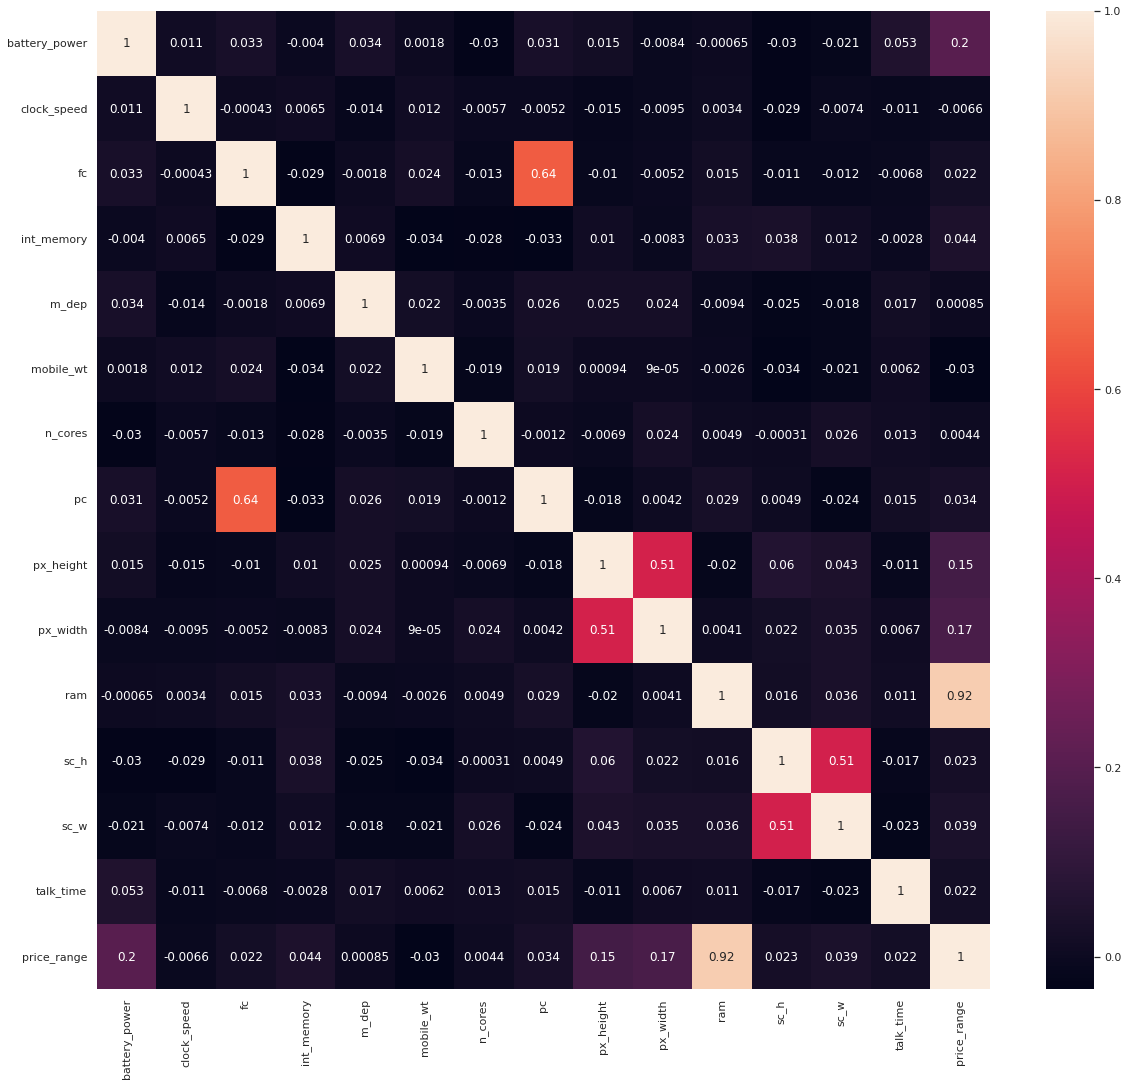

In [22]:
import matplotlib.pyplot as plt

corr_df = df[varNum + ['price_range']].corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr_df, annot=True)
plt.show()

Con lo anterior podemos fácilmente observar que, de todas las columnas, solo **ram** tiene una correlación notable con la variable objetivo **price_range**, solo seguido por **battery_power**, **px_width** y **px_height** pero con una amplia diferencia.

Gracias al análisis de correlaciones sería posible identificar variables que tengan una alta correlación positiva entre ellas (superior al 0.8) puesto que la variación de una puede tener cierta influencia en otra, por lo que se podría únicamente considerar una de ellas y descartar la otra, pero, para el presente ejemplo, no hay pares de variables que cumplan con dicha característica, por lo que todas generan una influencia distinta sobre el resultado.

Graficamos las variables con mayor correlación con respecto a la variable objetivo.

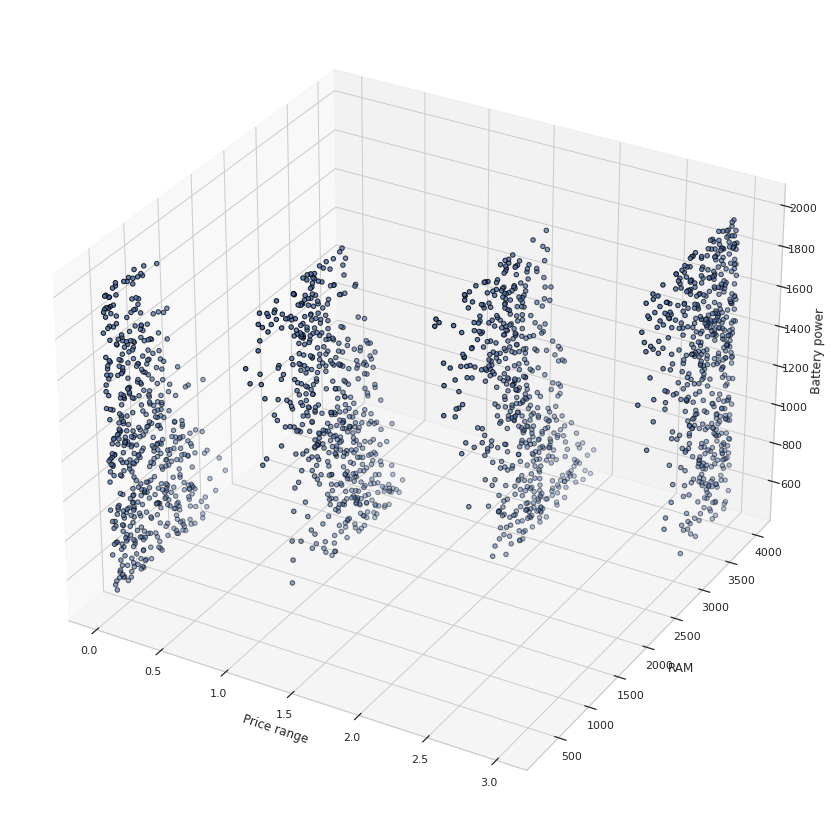

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['price_range'], df['ram'], df['battery_power'], edgecolors='black')
ax.set_xlabel('Price range')
ax.set_ylabel('RAM')
ax.set_zlabel('Battery power')
plt.show()

Observamos que, como se mencionó previamente, existe una relación directa entre la RAM y el rango de precios; al incrementar la cantidad de RAM, cambia el rango de precios, aunque existen afectaciones por variables que no son fácilmente perceptibles por el humano por las cuales existan dispositivos con la misma RAM pero diferente rango de precios. El modelo a implementar debe ser capaz de identificar los patrones que definan la diferencia entre estos dispositivos.

## Separación de los datos en entradas y salida

Se separan los datos a utilizar en los modelos.

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
#X = X.values
#y = y.values

Lo que es X representa al conjunto de características o variables independientes que son utilizadas como entrada en los modelos de aprendizaje automático, mientras que y representa a la variable independiente o a predecir, esta puede ser una clasificación o un valor contínuo. Para el presente trabajo, y representa una clase de las 4 que conforman los rangos de precios.

## Métodos de entrenamiento y evaluación de los modelos

Entre las alternativas para entrenar y evaluar los modelos generados pueden ser:

* Separación del dataset en entrenamiento (train) y prueba (test) con conjuntos establecidos. Para ello es posible utilizar la función train_test_split para dividir en el dataset y con ellos realizar el entrenamiento y las pruebas para la evaluación.
* Utilizando la estrategia de validación cruzada. Permite generar múltiples pruebas con el mismo dataset ya que se realizan diversas divisiones en bloques con las cuales se realiza el proceso de entrenamiento y prueba. Este método permite evaluar el modelo en múltiples iteraciones y promediando los resultados finales podemos obtener una mejor referencia del funcionamiento del modelo.

Para el presente trabajo, se decidió aplicar el método de validación cruzada y de esta forma poder obtener una evaluación más precisa del comportamiento de los modelos.

# Máquina de Soporte Vectorial (SVM)

A continuación, se evalúan diversos modelos de Máquinas de Soporte Vectorial, en los cuales se modifican sus parámetros como Kernel, Gamma y C.

Para la evaluación se utiliza la validación cruzada con K-Fold = 5, representando los 5 dobleces o grupos que se utilizarán en la evaluación.

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
import time

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = ['auto', 'scale']
Cs = [0.1, 0.5, 1.0]

print("{:7s} {:5s} {:3s} {:5s} {:5s} {:6s}".format('kernel', 'Gamma', 'C', 'Acc', 'SD', 'Time'))

for kernel in kernels:
  for gamma in gammas:
    for C in Cs:
      model = svm.SVC(kernel=kernel, gamma=gamma, C=C)
      ini = time.time()
      scores = cross_val_score(model, X, y, cv=5)
      tm = time.time() - ini

      print("{:7s} {:5s} {:.1f} {:.3f} {:.3f} {:.3f}".format(kernel, gamma, C, scores.mean(), scores.std(), tm))

kernel  Gamma C   Acc   SD    Time  
linear  auto  0.1 0.973 0.005 20.852
linear  auto  0.5 0.973 0.006 44.337
linear  auto  1.0 0.973 0.005 68.375
linear  scale 0.1 0.973 0.005 10.018
linear  scale 0.5 0.973 0.006 43.344
linear  scale 1.0 0.973 0.005 68.185
poly    auto  0.1 0.964 0.011 1.403
poly    auto  0.5 0.964 0.011 1.379
poly    auto  1.0 0.964 0.011 1.482
poly    scale 0.1 0.938 0.008 0.386
poly    scale 0.5 0.956 0.005 0.273
poly    scale 1.0 0.956 0.007 0.226
rbf     auto  0.1 0.317 0.012 1.557
rbf     auto  0.5 0.317 0.012 1.093
rbf     auto  1.0 0.303 0.022 1.247
rbf     scale 0.1 0.905 0.008 0.498
rbf     scale 0.5 0.948 0.008 0.307
rbf     scale 1.0 0.947 0.009 0.275
sigmoid auto  0.1 0.250 0.000 0.709
sigmoid auto  0.5 0.250 0.000 0.673
sigmoid auto  1.0 0.250 0.000 0.694
sigmoid scale 0.1 0.192 0.008 1.483
sigmoid scale 0.5 0.187 0.015 1.221
sigmoid scale 1.0 0.187 0.017 1.246


## Reducción del número de características

Una vez evaluados los modelos con el total de características del dataset, procedemos a disminuir el número de características utilizadas. Para ello, seleccionamos únicamente 10 de aquellas que mostraron una mayor correlación con la variable a predecir.

In [27]:
#X = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','fc','sc_h']]
X = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','pc','fc','sc_h']]
X.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,pc,fc,sc_h
0,2549,20,842,756,188,7,7,2,1,9
1,2631,905,1021,1988,136,53,3,6,0,17
2,2603,1263,563,1716,145,41,2,6,2,11
3,2769,1216,615,1786,131,10,8,9,0,16
4,1411,1208,1821,1212,141,44,2,14,13,8


In [28]:
y = df.iloc[:, -1]
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [29]:
X = X.values
y = y.values

In [30]:
from sklearn.model_selection import cross_val_score
import time

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = ['auto', 'scale']
Cs = [0.1, 0.5, 1.0]

print("{:7s} {:5s} {:3s} {:5s} {:5s} {:6s}".format('kernel', 'Gamma', 'C', 'Acc', 'SD', 'Time'))

for kernel in kernels:
  for gamma in gammas:
    for C in Cs:
      model = svm.SVC(kernel=kernel, gamma=gamma, C=C)
      ini = time.time()
      scores = cross_val_score(model, X, y, cv=5)
      tm = time.time() - ini

      print("{:7s} {:5s} {:.1f} {:.3f} {:.3f} {:.3f}".format(kernel, gamma, C, scores.mean(), scores.std(), tm))

kernel  Gamma C   Acc   SD    Time  
linear  auto  0.1 0.976 0.004 10.161
linear  auto  0.5 0.975 0.003 47.121
linear  auto  1.0 0.975 0.003 90.609
linear  scale 0.1 0.976 0.004 9.552
linear  scale 0.5 0.975 0.003 45.423
linear  scale 1.0 0.975 0.003 86.981
poly    auto  0.1 0.966 0.008 2.080
poly    auto  0.5 0.966 0.008 2.009
poly    auto  1.0 0.966 0.008 2.036
poly    scale 0.1 0.942 0.007 0.149
poly    scale 0.5 0.957 0.007 0.101
poly    scale 1.0 0.959 0.006 0.096
rbf     auto  0.1 0.266 0.006 0.830
rbf     auto  0.5 0.266 0.006 0.814
rbf     auto  1.0 0.266 0.006 0.815
rbf     scale 0.1 0.908 0.004 0.380
rbf     scale 0.5 0.948 0.003 0.236
rbf     scale 1.0 0.946 0.008 0.223
sigmoid auto  0.1 0.250 0.000 1.042
sigmoid auto  0.5 0.250 0.000 1.007
sigmoid auto  1.0 0.250 0.000 0.734
sigmoid scale 0.1 0.131 0.017 1.275
sigmoid scale 0.5 0.106 0.015 1.160
sigmoid scale 1.0 0.104 0.016 1.133


# **Red neuronal**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=12, input_dim=10, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 30)                390       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 4)                 124       
                                                                 
Total params: 1,576
Trainable params: 1,576
Non-trainable params: 0
_________________________________________________________________


In [32]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
import numpy as np

acc = []
for i in range(0,5):
  x_train, x_test, y_train, y_test = tts(X, y, test_size=0.2)

  history = model.fit(x_train, y_train, epochs=500, verbose=False)

  y_pred = model.predict(x_test)
  res = np.argmax(y_pred, axis=1)
  r = accuracy_score(y_test, res)
  acc.append(r)

print(acc)
print('Promedio:', np.mean(acc))

13/13 [==============================] - 0s 2ms/step
[0.8525, 0.9375, 0.9575, 0.9425, 0.965]
Promedio: 0.931


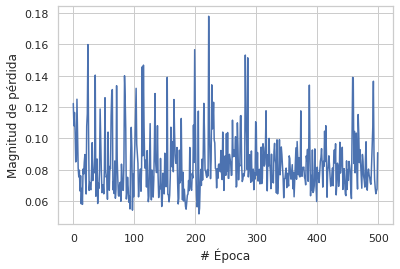

In [33]:
import matplotlib.pyplot as plt

plt.xlabel('# Época')
plt.ylabel('Magnitud de pérdida')
plt.plot(history.history['loss'])

In [34]:
from sklearn.metrics import confusion_matrix

c = confusion_matrix(res, y_test)
print(c)

[[ 97   2   0   0]
 [  4 100   1   0]
 [  0   6 104   0]
 [  0   0   1  85]]


# ¿Escalado de los datos?

En múltiples situaciones, el escalado de los datos que conforman el dataset permite adaptar los datos con la finalidad de eliminar influencias por datos atípicos.

A continuación, se realiza una ejecución tanto con la con la Máquina de Soporte Vectorial implementada y la Red Neuronal que mejores resultados han dado en el presente documento para su evaluación.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

AttributeError: ignored

In [36]:
from sklearn.model_selection import cross_val_score
import time

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = ['auto', 'scale']
Cs = [0.1, 0.5, 1.0]

print("{:7s} {:5s} {:3s} {:5s} {:5s} {:6s}".format('kernel', 'Gamma', 'C', 'Acc', 'SD', 'Time'))

for kernel in kernels:
  for gamma in gammas:
    for C in Cs:
      model = svm.SVC(kernel=kernel, gamma=gamma, C=C)
      ini = time.time()
      scores = cross_val_score(model, X, y, cv=5)
      tm = time.time() - ini

      print("{:7s} {:5s} {:.1f} {:.3f} {:.3f} {:.3f}".format(kernel, gamma, C, scores.mean(), scores.std(), tm))

kernel  Gamma C   Acc   SD    Time  
linear  auto  0.1 0.964 0.005 0.212
linear  auto  0.5 0.966 0.003 0.188
linear  auto  1.0 0.971 0.004 0.189
linear  scale 0.1 0.964 0.005 0.208
linear  scale 0.5 0.966 0.003 0.190
linear  scale 1.0 0.971 0.004 0.192
poly    auto  0.1 0.703 0.008 0.520
poly    auto  0.5 0.820 0.010 0.395
poly    auto  1.0 0.844 0.011 0.397
poly    scale 0.1 0.703 0.009 0.502
poly    scale 0.5 0.820 0.010 0.548
poly    scale 1.0 0.844 0.012 0.650
rbf     auto  0.1 0.844 0.028 1.144
rbf     auto  0.5 0.916 0.008 0.573
rbf     auto  1.0 0.916 0.007 0.408
rbf     scale 0.1 0.844 0.028 0.656
rbf     scale 0.5 0.916 0.008 0.449
rbf     scale 1.0 0.916 0.007 0.413
sigmoid auto  0.1 0.932 0.007 0.787
sigmoid auto  0.5 0.903 0.019 0.493
sigmoid auto  1.0 0.869 0.013 0.403
sigmoid scale 0.1 0.932 0.006 0.781
sigmoid scale 0.5 0.907 0.019 0.501
sigmoid scale 1.0 0.872 0.012 0.379


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=12, input_dim=10, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
import numpy as np

acc = []
for i in range(0,5):
  x_train, x_test, y_train, y_test = tts(X, y, test_size=0.2)

  history = model.fit(x_train, y_train, epochs=500, verbose=False)

  y_pred = model.predict(x_test)
  res = np.argmax(y_pred, axis=1)
  r = accuracy_score(y_test, res)
  acc.append(r)

print(acc)
print('Promedio:', np.mean(acc))

13/13 [==============================] - 0s 2ms/step
[0.93, 0.97, 0.975, 0.98, 0.9925]
Promedio: 0.9695


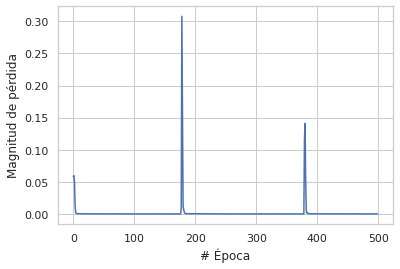

In [38]:
import matplotlib.pyplot as plt

plt.xlabel('# Época')
plt.ylabel('Magnitud de pérdida')
plt.plot(history.history['loss'])

In [39]:
from sklearn.metrics import confusion_matrix

c = confusion_matrix(res, y_test)
print(c)

[[ 92   0   0   0]
 [  0  90   2   0]
 [  0   0 113   0]
 [  0   0   1 102]]
